<a href="https://colab.research.google.com/github/fmseyma/GlobalAIHub-SummerCamp22-TransferLearning/blob/main/Cats%26Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ön İşleme 

Gerekli kütüphaneler içe aktarıldı.

In [ ]:
datasetdir = '/content/path_to_directory/PetImages'
import os
import numpy as np
import PIL

# import the needed packages
import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras

import sklearn
from sklearn.model_selection import train_test_split

ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator


.zip uzantılı yüklenen veri seti açılmalıdır.

Böylece path_to_directory isimli klasörün içine PetImages dosyası açıldı.

In [ ]:
!unzip -q ../content/PetImages.zip -d path_to_directory

unzip:  cannot find or open ../content/PetImages.zip, ../content/PetImages.zip.zip or ../content/PetImages.zip.ZIP.


Önce veri setine göz atmak için birkaç görsel ekrana yazdırıldı.


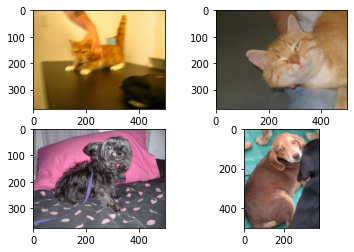

In [ ]:
plt.subplot(2,2,1)
plt.imshow(img.imread('/content/path_to_directory/PetImages/Cat/0.jpg'))
plt.subplot(2,2,2)
plt.imshow(img.imread('/content/path_to_directory/PetImages/Cat/250.jpg'))


plt.subplot(2,2,3)
plt.imshow(img.imread('/content/path_to_directory/PetImages/Dog/0.jpg'))
plt.subplot(2,2,4)
plt.imshow(img.imread('/content/path_to_directory/PetImages/Dog/250.jpg'))


Resimlerle ilgili daha spesifik bilgiler için aşağıdaki kod yazıldı.

Bu sayede görüntülerin piksel cinsinden yüksekliği ve genişliği öğrenildi. 

Ayrıca renk kanalları sayısı da öğrenildi.

In [ ]:
images = []
for i in range(10):
  im = img.imread('Cat/{}.jpg'.format(i))
  images.append(im)
  print('image shape', im.shape)

image shape (375, 500, 3)
image shape (281, 300, 3)
image shape (397, 312, 3)
image shape (415, 500, 3)
image shape (375, 500, 3)
image shape (144, 176, 3)
image shape (304, 400, 3)
image shape (500, 495, 3)
image shape (346, 461, 3)
image shape (426, 320, 3)


Görüntülerin içinde bulunan .db uzantılı dosyalar silindi.

Toplam kedi ve köpek veri sayısı ekrana yazdırıldı.

In [ ]:
source_path = '/content/path_to_directory/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')

#Bunu daha az amelece yapmak isterdim...

if os.path.exists("/content/path_to_directory/PetImages/Cat/Thumbs.db"):
  os.remove("/content/path_to_directory/PetImages/Cat/Thumbs.db")

if os.path.exists("/content/path_to_directory/PetImages/Dog/Thumbs.db"):
  os.remove("/content/path_to_directory/PetImages/Dog/Thumbs.db")


print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12500 images of dogs.
There are 12500 images of cats.


Görüntüleri veri dizinine dönüştürmek için ImageDataGenerator() kullanıldı.

In [ ]:
gen = ImageDataGenerator(
    featurewise_std_normalization = True
)

Görsellerin resize işlemi yapıldı.

In [ ]:
iterator = gen.flow_from_directory(
    os.getcwd(), 
    target_size=(256,256), 
    classes=('Dog','Cat')
)

Found 25000 images belonging to 2 classes.


Görüntü dizisini tam sayılara çevirmemiz gerekiyor.

imshow() olarak çizmeden önce ya tamsayı dizileri alır,veya 1'e normalleştirilmiş float dizileri.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


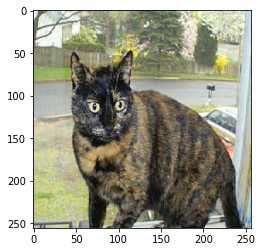

In [ ]:
plt.imshow(batch[0][0].astype(np.int))

In [ ]:
batch[1][0]

array([0., 1.], dtype=float32)

ImageDataGenerator , bulunduğu dizine bağlı olarak her görüntü için otomatik olarak bir etiket oluşturur.

Etiketler için one-hot encoding kodlama kullanır.

Etiketleri kontrol etmek için aşağıdaki fonksiyon yazılmıştır.


In [ ]:
def plot_images(batch):
    imgs = batch[0]
    labels = batch[1]
    ncols, nrows = 4,8
    fig = plt.figure( figsize=(ncols*3, nrows*3), dpi=90)
    for i, (img,label) in enumerate(zip(imgs,labels)):
      plt.subplot(nrows, ncols, i+1)
      plt.imshow(img.astype(np.int))
      assert(label[0]+label[1]==1.)
      categ = 'dog' if label[0]>0.5 else 'cat'
      plt.title( '{} {}'.format(str(label), categ))
      plt.axis('off')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


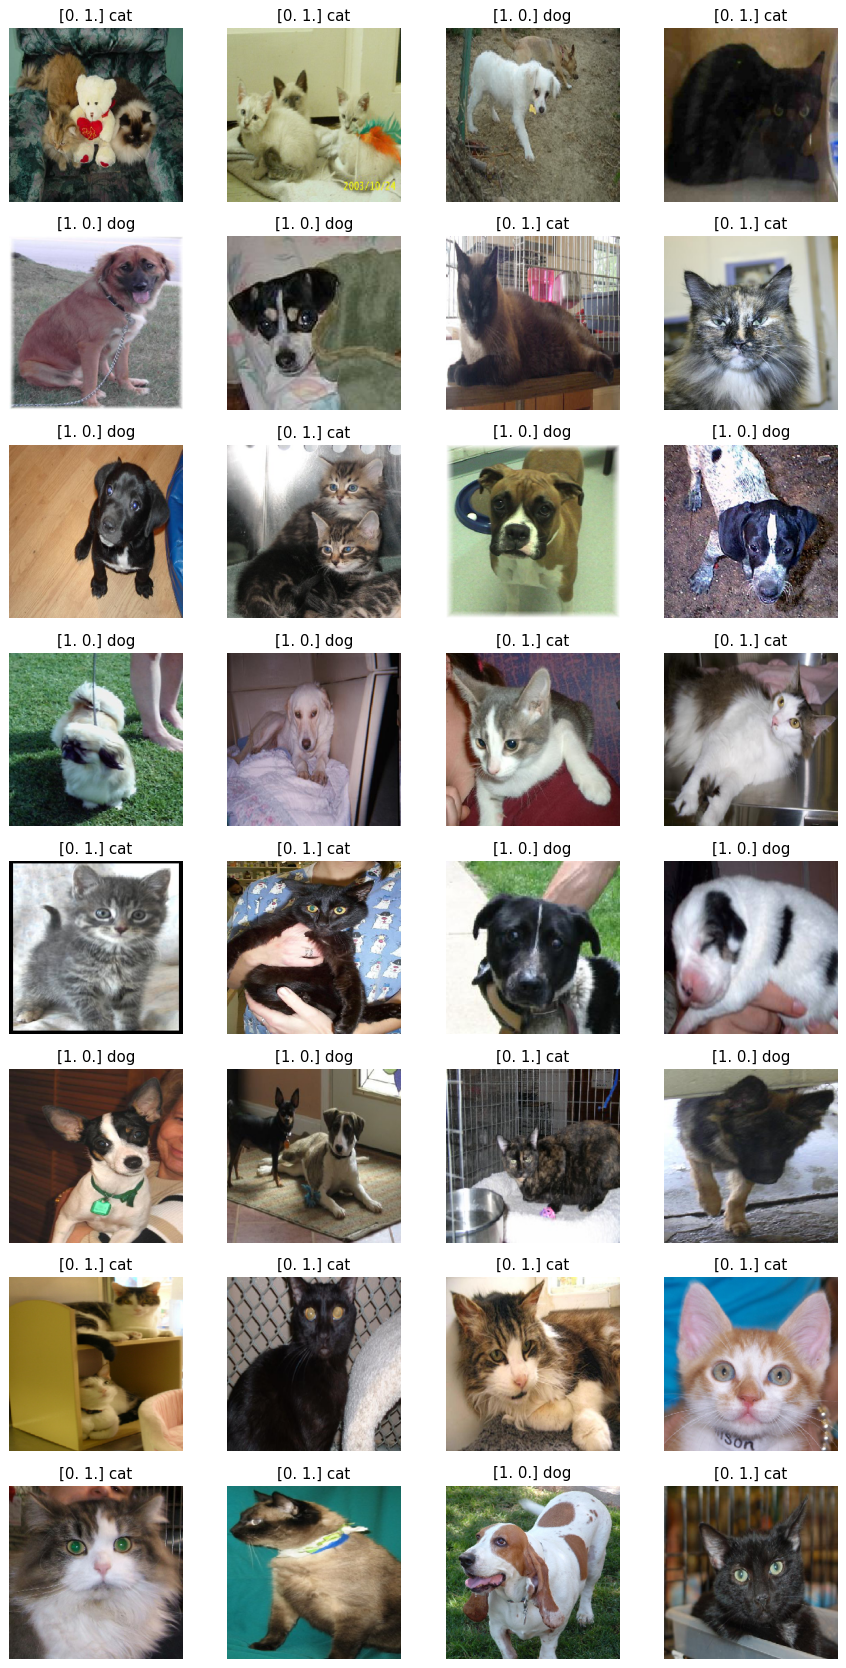

In [ ]:
plot_images(iterator.next())

Test Train ve Validation olarak veri bölündü.

In [ ]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    validation_split = 0.2,
)

In [ ]:
from sklearn import datasets

X, y = datasets.make_blobs(n_samples=10000, centers=2, random_state=0)

print(np.bincount(y)[0]/np.bincount(y)[1]) # 1.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


1.0


In [ ]:
batch_size = 30
height, width = (256,256)

train_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('Dog','Cat'),
    batch_size = batch_size,
    subset = 'training'
)

val_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('Dog','Cat'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
